In [37]:
import os
import pandas as pd
from utils import save_dataframe_as_latex

#database = 'a5a'
#database = 'abalone'
#database = 'CPU_SMALL'
#database = 'Diabetes'
#database = 'w3a'

database = 'eunite2001'
#database = 'Diabetes'

path = '/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/'
directory = path + f'results/{database}/accuracy_time_stats'  # Replace this with the path to your directory
verbose_path = path + f'results/{database}/verboses'
analysis_files = path + f'analysis/{database}'
plot_path = f'{analysis_files}/plot/'
tables_path = f'{analysis_files}/latex-tables/'

## columns names 
percent_column = 'percent'
n_components_column = 'n_components' 
score_column = 'Mean Score in test'		
time_column = 'Mean Training Time'
damping_column = 'damping'


# Get a list of all files in the directory
files = [file for file in os.listdir(directory) if os.path.isfile(os.path.join(directory, file))]

# Now 'files' contains a list of the names of all files in the directory
print(files)

# Separate files with "classification" in their name
ridge_files = [file for file in files if "ridge" in file]
ridge_files.sort()

# Separate other files
svm_files = [file for file in files if file not in ridge_files]
svm_files.sort()
damping_formula = lambda accuracy, time : accuracy / time *100

score_column, time_column = ('Mean Score in test', 'Mean Training Time')

def damping_df(df):
    df[damping_column] = damping_formula(df[score_column],df[time_column])
    return df

 
# Create a DataFrame for ridge files
ridge_data = pd.DataFrame()
ridge_list = []
ridge_list_names = []
ridge_data_verbose = pd.DataFrame()
for file in ridge_files:
    # mean
    file_path = os.path.join(directory, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    #data[percent_column] = data.apply(compute_percent, axis=1)

    data = damping_df(data)
    ridge_list_names.append(file)
    data = data.sort_values(by=n_components_column)
    data['File'] = file  # Add a column to identify the file 
    ridge_data = pd.concat([ridge_data, data], ignore_index=True)
    ridge_list.append(data)

    # verbose
    file_path = os.path.join(verbose_path, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    data = data.sort_values(by=n_components_column)
    data['File'] = file  # Add a column to identify the file
    ridge_data_verbose = pd.concat([ridge_data_verbose, data], ignore_index=True) 


svm_data = pd.DataFrame()
svm_data_verbose = pd.DataFrame()
svm_list = []
svm_list_names = []
for file in svm_files:
    file_path = os.path.join(directory, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    #data[percent_column] = data.apply(compute_percent, axis=1)
    #data = data.sort_values(by=n_components_column)
    data = damping_df(data)
    data['File'] = file  # Add a column to identify the file
    data = data.sort_values(by=n_components_column)
    svm_data = pd.concat([svm_data, data], ignore_index=True)
    svm_list.append(data)
    svm_list_names.append(file)
    # verbose
    file_path = os.path.join(verbose_path, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    #data[percent_column] = data.apply(compute_percent, axis=1)
    #data = data.sort_values(by=n_components_column)
    data['File'] = file  # Add a column to identify the file
    svm_data_verbose = pd.concat([svm_data_verbose, data], ignore_index=True)

print('Ridge files')
print(svm_list_names)
print('SvM files')
print(svm_list_names)
svm_data

std_column = 'Std Score in test'
if (ridge_list[0][std_column] == 0).all():
    std_column = 'cv_std_test_score'

print(std_column)
svm_data

['Kernel_SVM_w3a_cv_5.csv', 'Random_Fourier_features_and_SVC_w3a_cv_5.csv', 'Kernel_ridge_classification_w3a_cv_5.csv', 'Nystrom_and_ridge_classification_w3a_cv_5.csv', 'Nystrom_and_SVC_w3a_cv_5.csv', 'Random_Fourier_features_and_ridge_classification_w3a_cv_5.csv']
Ridge files
['Kernel_SVM_w3a_cv_5.csv', 'Nystrom_and_SVC_w3a_cv_5.csv', 'Random_Fourier_features_and_SVC_w3a_cv_5.csv']
SvM files
['Kernel_SVM_w3a_cv_5.csv', 'Nystrom_and_SVC_w3a_cv_5.csv', 'Random_Fourier_features_and_SVC_w3a_cv_5.csv']
cv_std_test_score


,percent,n_components,Mean Score in test,Std Score in test,Mean Training Time,Std Training Time,Mean Best Score in CV,Std Best Score in CV,cv_mean_test_score,cv_std_test_score,cv_mean_fit_time,cv_std_fit_time,damping,File
0,100,4912,0.970203,0.0,0.369331,0.0,0.970888,0.0,0.970888,0.000489,0.471575,0.038931,262.691795,Kernel_SVM_w3a_cv_5.csv
1,1,49,0.979169,0.0,0.261207,0.0,0.975979,0.0,0.975979,0.005626,0.123445,0.023963,374.862736,Nystrom_and_SVC_w3a_cv_5.csv
2,2,98,0.979281,0.0,0.260533,0.0,0.975571,0.0,0.975571,0.005677,0.159410,0.033759,375.876010,Nystrom_and_SVC_w3a_cv_5.csv
3,4,196,0.980463,0.0,0.447767,0.0,0.974350,0.0,0.974350,0.006246,0.345234,0.096802,218.966891,Nystrom_and_SVC_w3a_cv_5.csv
4,5,245,0.975957,0.0,0.443468,0.0,0.973942,0.0,0.973942,0.003996,0.576913,0.109784,220.073743,Nystrom_and_SVC_w3a_cv_5.csv
5,7,343,0.981712,0.0,0.552815,0.0,0.973536,0.0,0.973536,0.005923,0.753920,0.157875,177.584111,Nystrom_and_SVC_w3a_cv_5.csv
6,9,442,0.981355,0.0,0.859468,0.0,0.974554,0.0,0.974554,0.006199,1.071722,0.187238,114.181614,Nystrom_and_SVC_w3a_cv_5.csv
7,10,491,0.981265,0.0,1.013423,0.0,0.972111,0.0,0.972111,0.005121,1.190984,0.198621,96.826867,Nystrom_and_SVC_w3a_cv_5.csv
8,12,589,0.981645,0.0,1.364336,0.0,0.973129,0.0,0.973129,0.006250,1.484940,0.395303,71.950344,Nystrom_and_SVC_w3a_cv_5.csv
9,13,638,0.977898,0.0,1.406169,0.0,0.971500,0.0,0.971500,0.004674,1.694645,0.413920,69.543414,Nystrom_and_SVC_w3a_cv_5.csv


In [38]:
def show_dataframe(dataframe, column, ascending = True, decimals = 3, only_relevant_columns = True, n_rows = None):
      pd.reset_option('display.max_colwidth')
      pd.set_option('display.max_rows', n_rows)
      dataframe =  pd.DataFrame(dataframe).round(decimals).sort_values(by=column, ascending= ascending)

      if only_relevant_columns:
            dataframe = dataframe[["File","percent", column, "n_components" ]]
   
      return dataframe

score_column = ridge_data.columns[2]
time_column = ridge_data.columns[4]
name_column = 'File'

def show_verbose(dataframe, column = n_components_column, ascending = False, decimals = 3, n_rows = None):
      pd.set_option('display.max_colwidth', None)
      pd.set_option('display.max_rows', n_rows)
      dataframe =  pd.DataFrame(dataframe).round(decimals).sort_values(by=column, ascending= ascending)
      return dataframe[["Best Parameters","File","percent", "n_components" ]]


In [39]:
# get tables 
columns = [score_column, time_column, damping_column ]
for column in columns:
    column_name = column.replace(' ', '_').replace('_', '-')
    df = show_dataframe(ridge_data, column, ascending=False)
    save_dataframe_as_latex(df, tables_path, f'Ridge-{column_name}-result')
    df = show_dataframe(svm_data, column, ascending=False)
    save_dataframe_as_latex(df, tables_path, f'SVM-{column_name}-result')

DataFrame saved as LaTeX table to /Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/analysis/w3a/latex-tables/Ridge-Mean-Score-in-test-result.tex
DataFrame saved as LaTeX table to /Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/analysis/w3a/latex-tables/SVM-Mean-Score-in-test-result.tex
DataFrame saved as LaTeX table to /Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/analysis/w3a/latex-tables/Ridge-Mean-Training-Time-result.tex
DataFrame saved as LaTeX table to /Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/analysis/w3a/latex-tables/SVM-Mean-Training-Time-result.tex
DataFrame saved as LaTeX table to /Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/analysis/w3a/latex-tables/Ridge-damping-result.tex
DataFrame saved as LaTeX table to /Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/

# Sort by score 

In [40]:

show_dataframe(svm_data, score_column, ascending=False)

,File,percent,Mean Score in test,n_components
12,Nystrom_and_SVC_w3a_cv_5.csv,18,0.983,884
23,Random_Fourier_features_and_SVC_w3a_cv_5.csv,10,0.983,491
14,Nystrom_and_SVC_w3a_cv_5.csv,21,0.982,1031
10,Nystrom_and_SVC_w3a_cv_5.csv,15,0.982,736
15,Nystrom_and_SVC_w3a_cv_5.csv,23,0.982,1129
8,Nystrom_and_SVC_w3a_cv_5.csv,12,0.982,589
5,Nystrom_and_SVC_w3a_cv_5.csv,7,0.982,343
6,Nystrom_and_SVC_w3a_cv_5.csv,9,0.981,442
7,Nystrom_and_SVC_w3a_cv_5.csv,10,0.981,491
17,Random_Fourier_features_and_SVC_w3a_cv_5.csv,1,0.980,49


# Damping

In [41]:
show_dataframe(ridge_data, damping_column, ascending=False)

,File,percent,damping,n_components
17,Random_Fourier_features_and_ridge_classificati...,1,1274.827,49
18,Random_Fourier_features_and_ridge_classificati...,2,864.279,98
1,Nystrom_and_ridge_classification_w3a_cv_5.csv,1,805.957,49
2,Nystrom_and_ridge_classification_w3a_cv_5.csv,2,620.969,98
19,Random_Fourier_features_and_ridge_classificati...,4,605.658,196
20,Random_Fourier_features_and_ridge_classificati...,5,580.865,245
3,Nystrom_and_ridge_classification_w3a_cv_5.csv,4,433.461,196
21,Random_Fourier_features_and_ridge_classificati...,7,351.784,343
4,Nystrom_and_ridge_classification_w3a_cv_5.csv,5,336.683,245
22,Random_Fourier_features_and_ridge_classificati...,9,311.214,442


# Plotting 
## Ridge

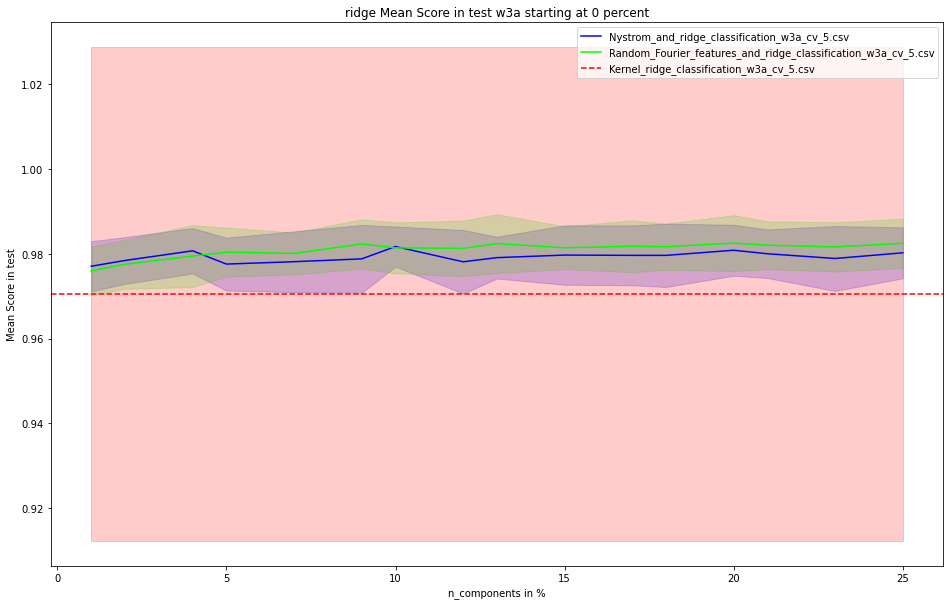

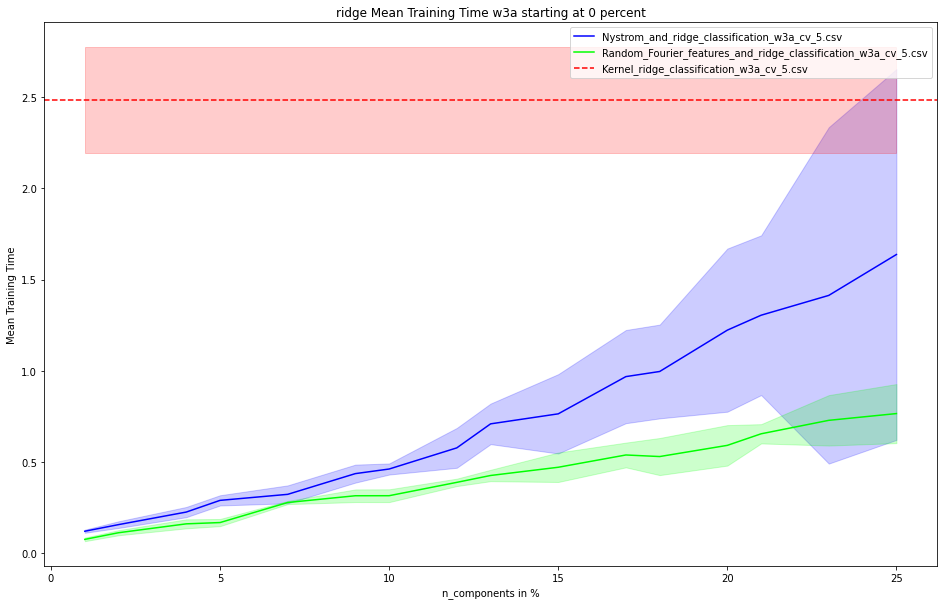

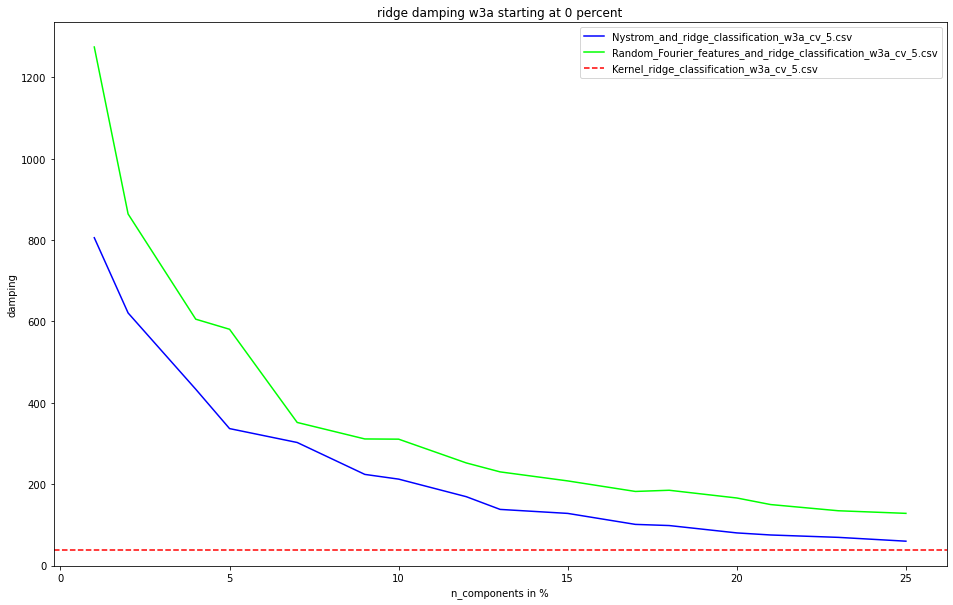

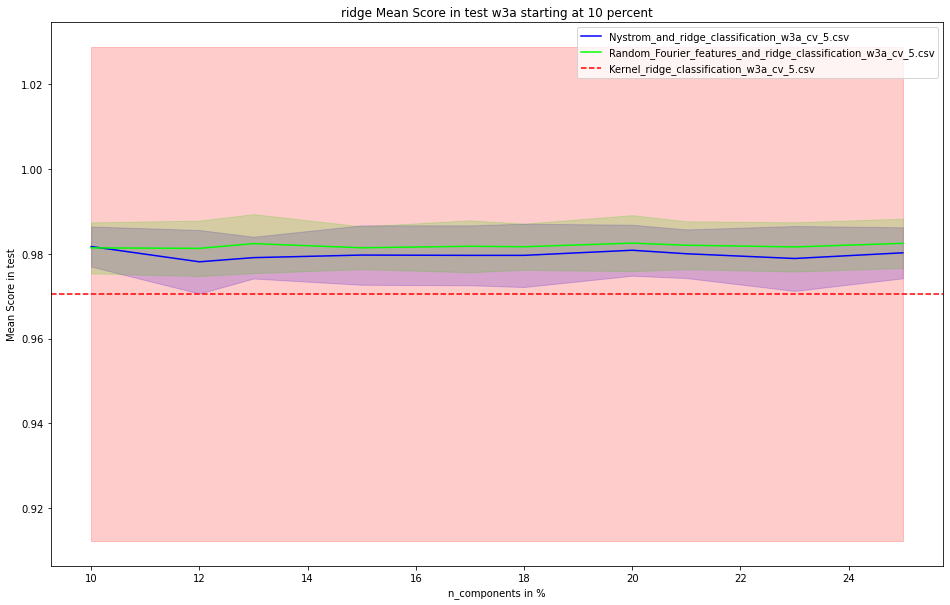

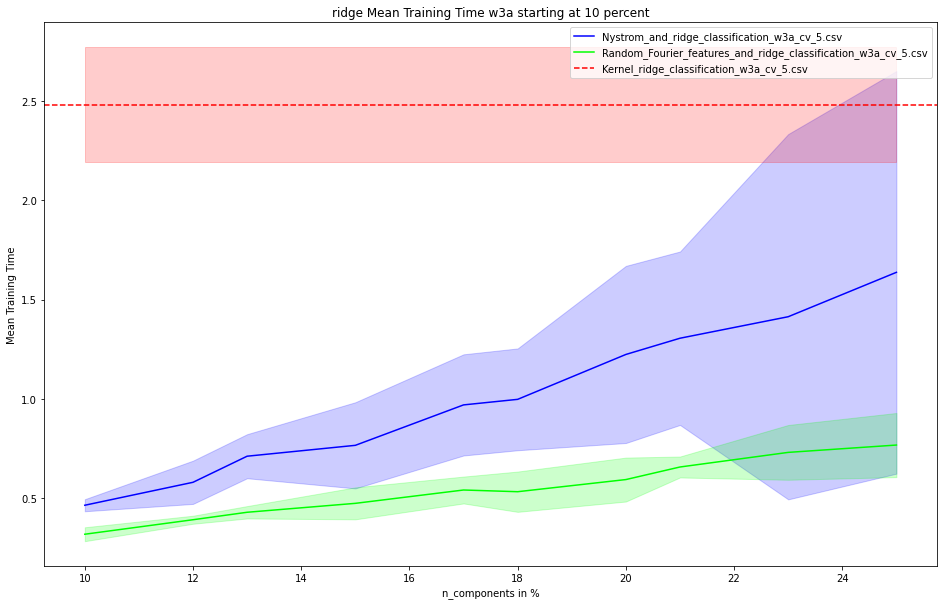

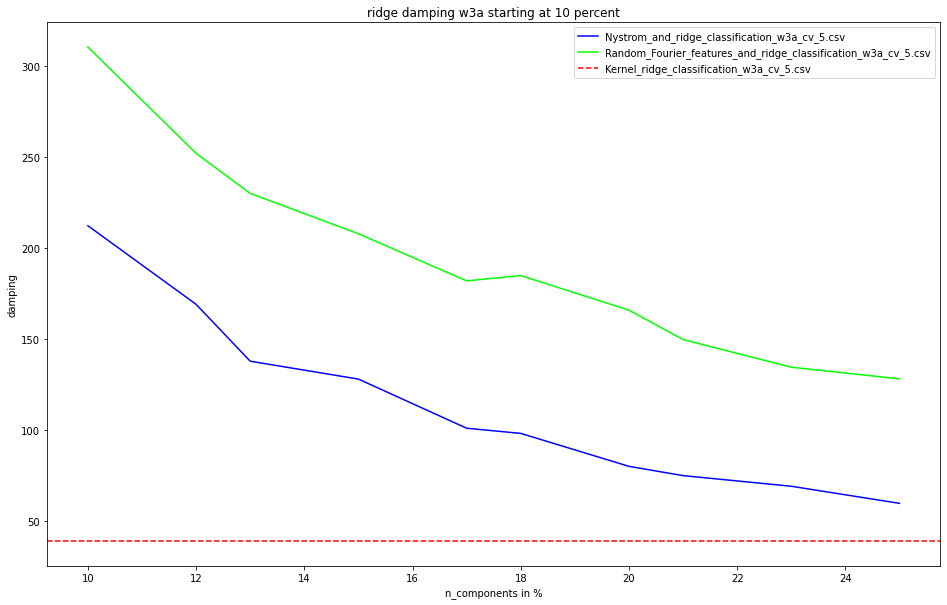

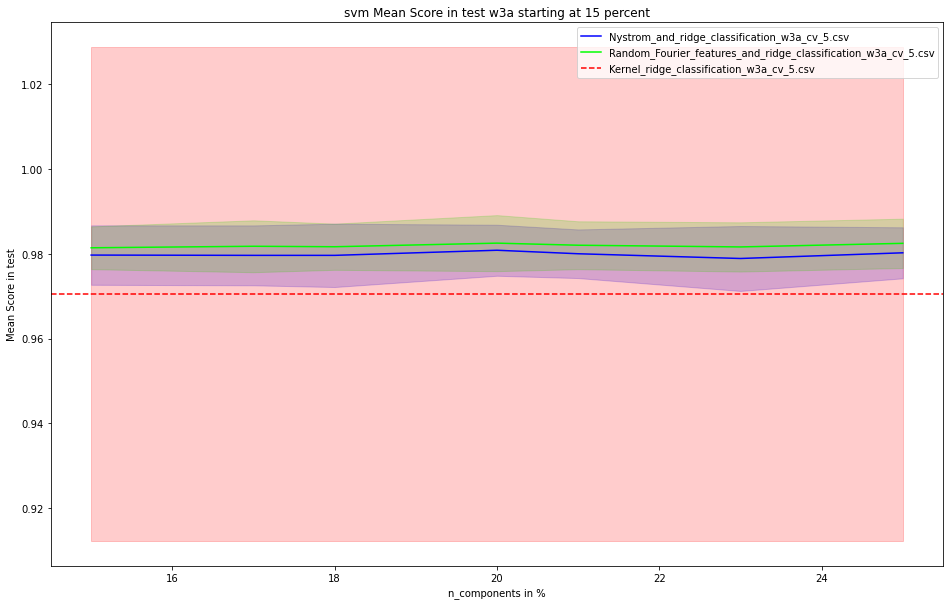

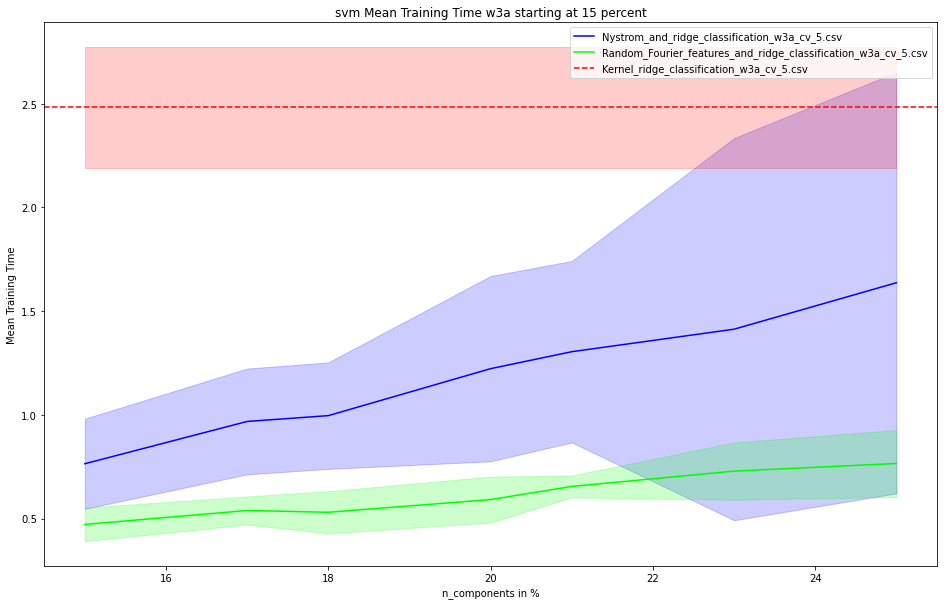

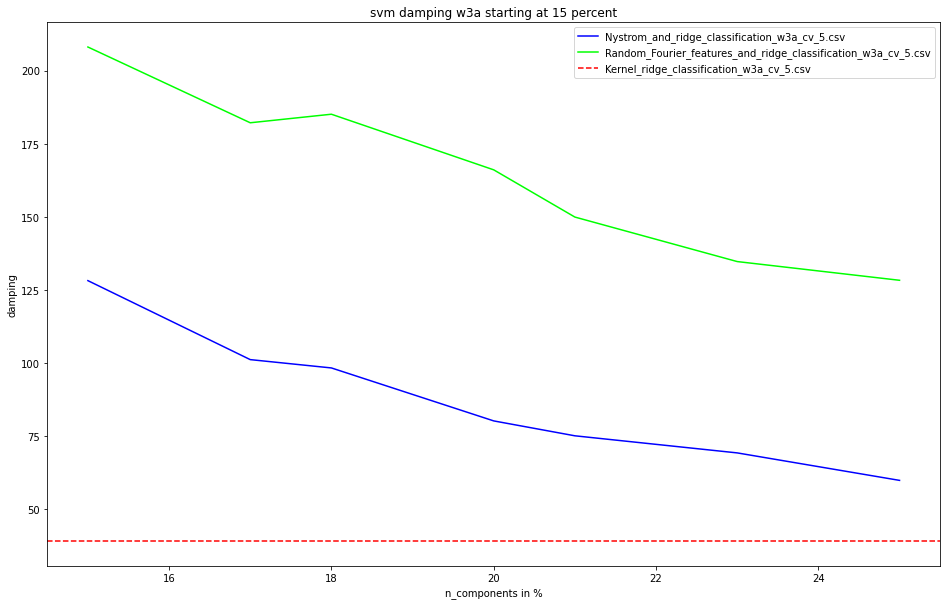

In [42]:
from plotting import view_plots_and_save_them

names_of_std_for_column = {score_column:'Std Score in test', 
    time_column:'Std Training Time',
    damping_column:False
}
if (ridge_list[0][names_of_std_for_column[score_column]] == 0).all():
    names_of_std_for_column = {score_column:'cv_std_test_score', 
        time_column:'cv_std_fit_time',
        damping_column:False
    }
    
columns = [score_column, time_column, damping_column ]

view_plots_and_save_them(df_list = ridge_list, df_list_names=ridge_list_names,
            names_of_std_for_column=names_of_std_for_column, type ='ridge',
            columns=columns, database=database, plot_path = plot_path,
            percent_of_n_components_bigger_than = 0)
view_plots_and_save_them(df_list = ridge_list, df_list_names=ridge_list_names,
            names_of_std_for_column=names_of_std_for_column, type ='ridge',
            columns=columns, database=database, plot_path = plot_path,
            percent_of_n_components_bigger_than = 10)
view_plots_and_save_them(df_list = ridge_list, df_list_names=ridge_list_names,
            names_of_std_for_column=names_of_std_for_column, type ='svm',
            columns=columns, database=database, plot_path = plot_path,
            percent_of_n_components_bigger_than = 15)

## SVM 

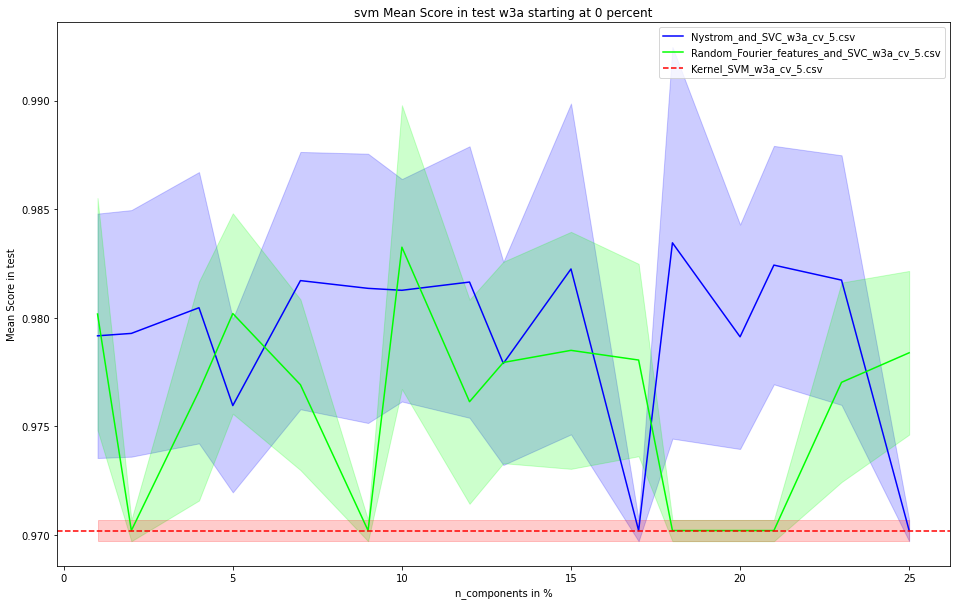

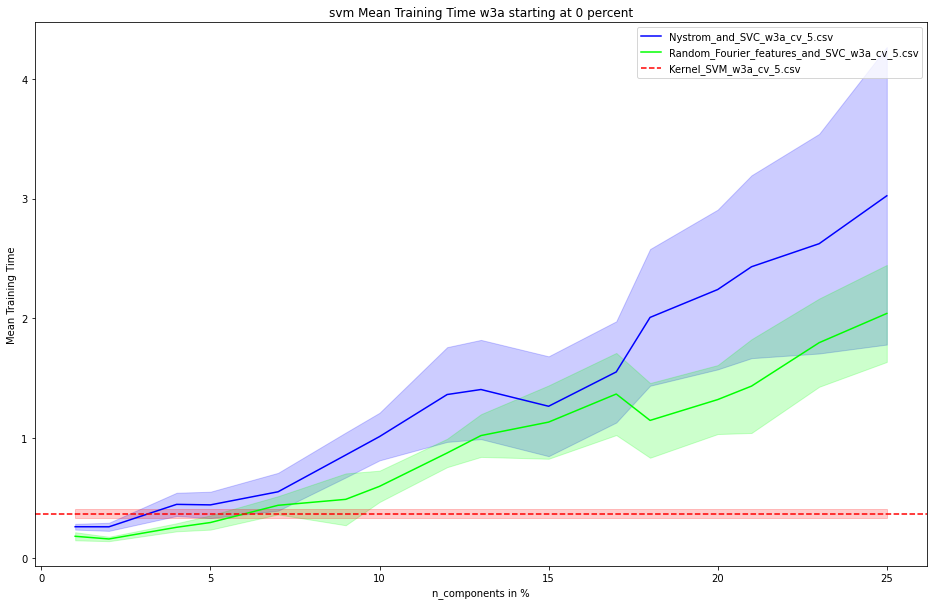

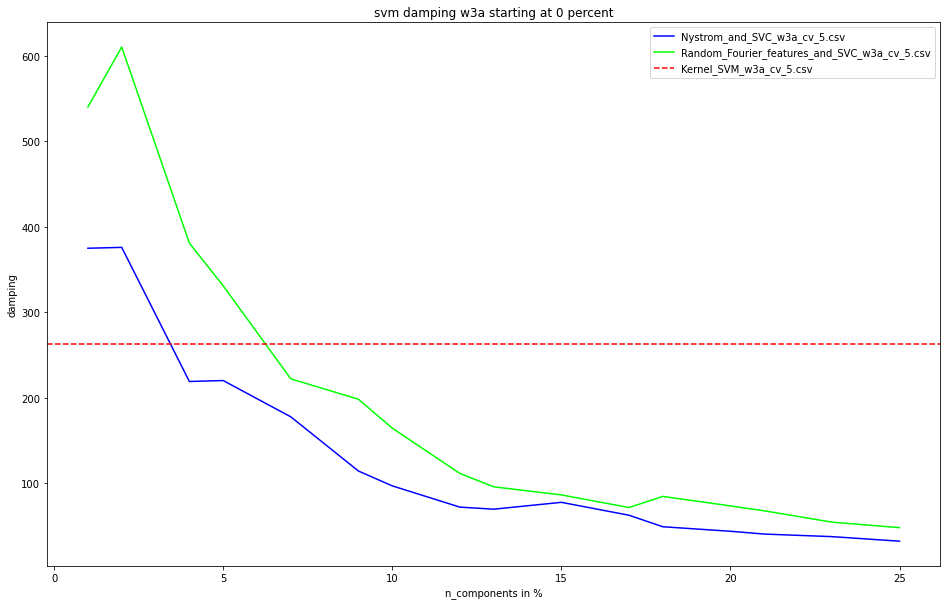

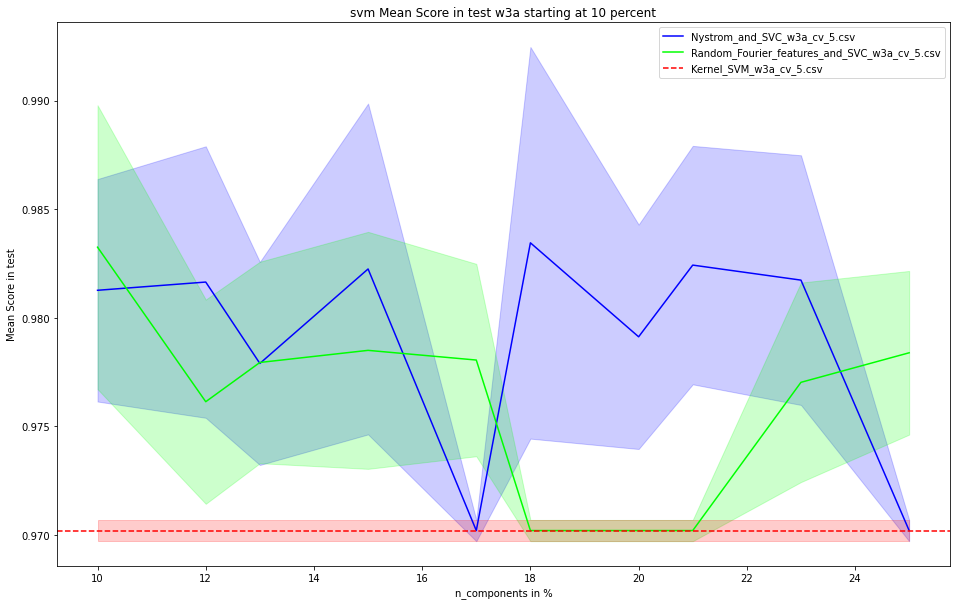

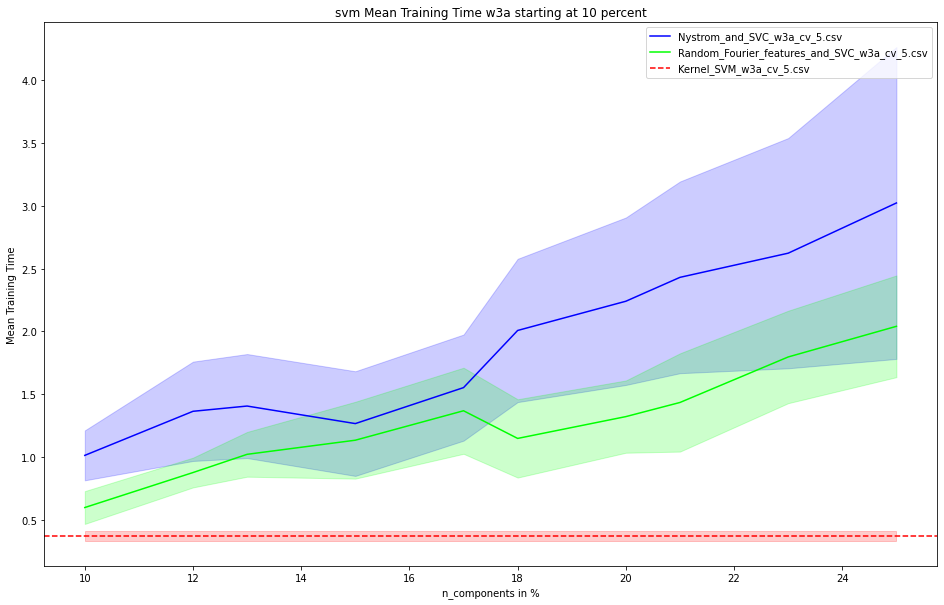

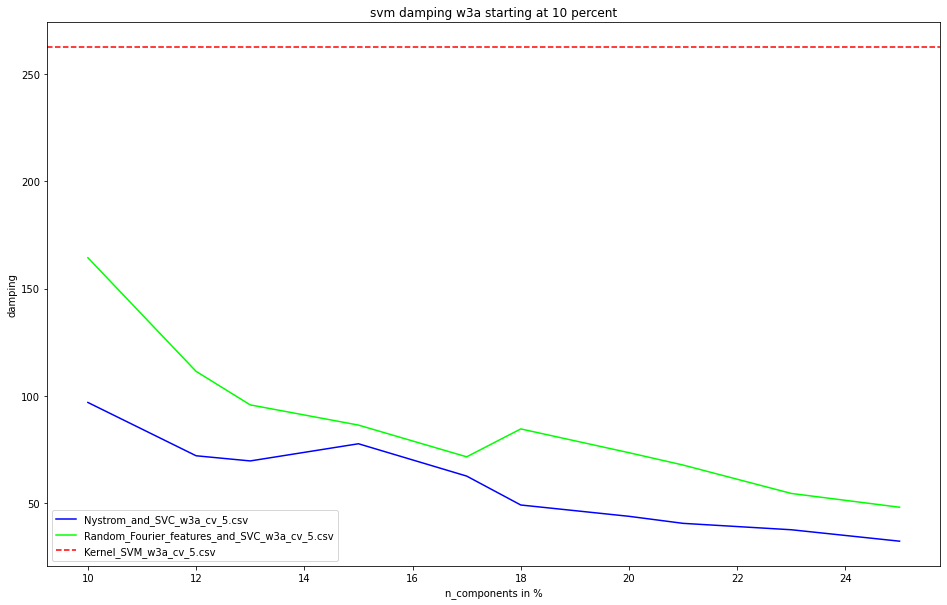

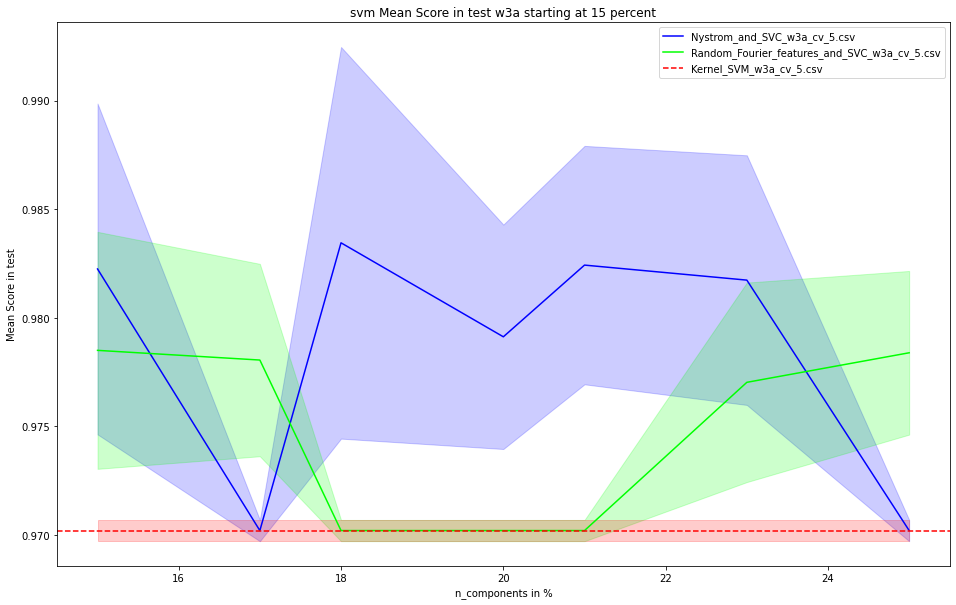

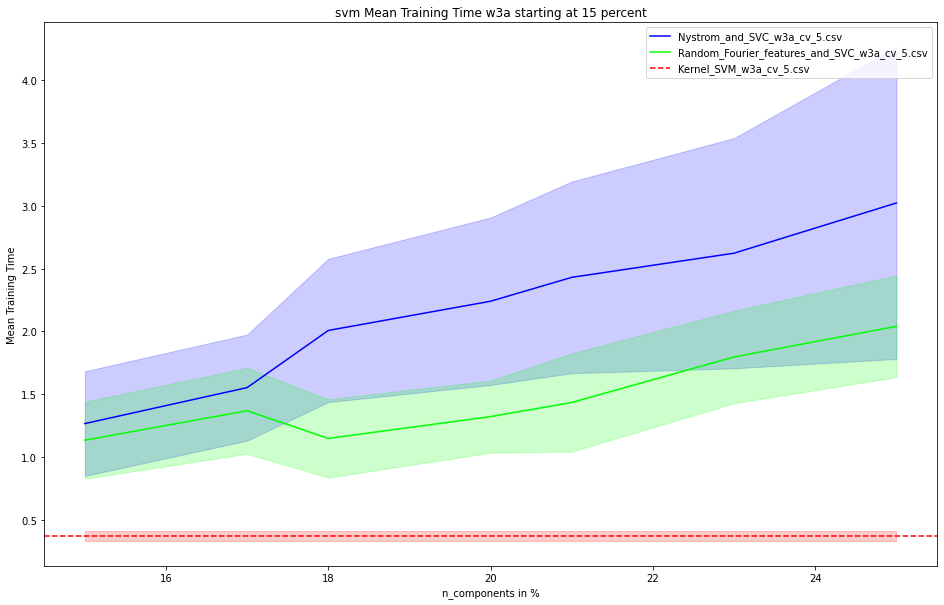

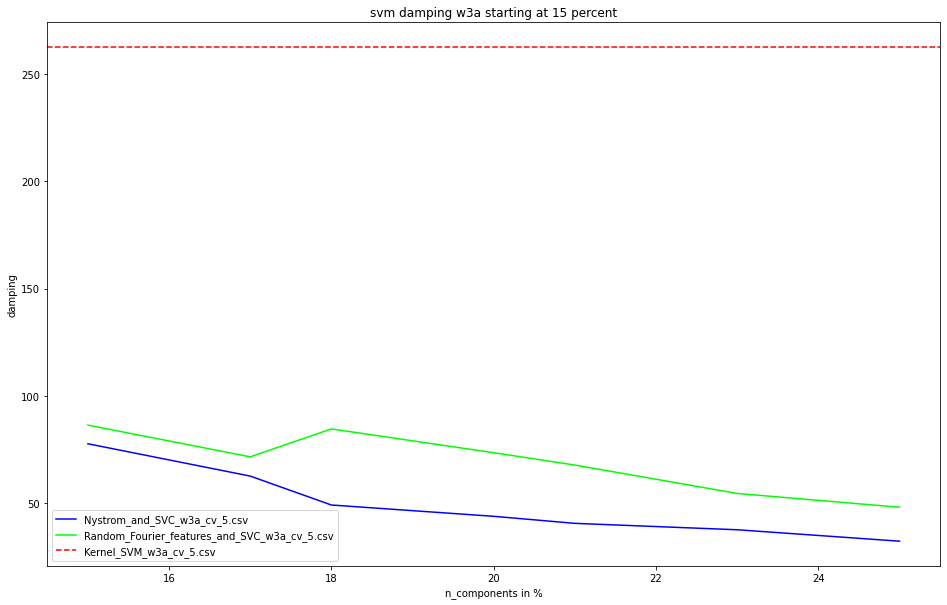

In [43]:
view_plots_and_save_them(df_list = svm_list, df_list_names=svm_list_names,
            names_of_std_for_column=names_of_std_for_column, type ='svm',
            columns=columns, database=database, plot_path = plot_path,
            percent_of_n_components_bigger_than = 0)
view_plots_and_save_them(df_list = svm_list, df_list_names=svm_list_names,
            names_of_std_for_column=names_of_std_for_column, type ='svm',
            columns=columns, database=database, plot_path = plot_path,
            percent_of_n_components_bigger_than = 10)
view_plots_and_save_them(df_list = svm_list, df_list_names=svm_list_names,
            names_of_std_for_column=names_of_std_for_column, type ='svm',
            columns=columns, database=database, plot_path = plot_path,
            percent_of_n_components_bigger_than = 15)

# Hyperparameter

In [44]:
def unique_values(df):
    return df.groupby(['Best Parameters', 'File']).size().reset_index(name='Frequency')

df = unique_values(svm_data_verbose)
save_dataframe_as_latex(df, tables_path, 'svm-best-hyperparameters')
df

DataFrame saved as LaTeX table to /Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/analysis/w3a/latex-tables/svm-best-hyperparameters.tex


,Best Parameters,File,Frequency
0,{'fourier_random_features__gamma': 0.000157887...,Random_Fourier_features_and_SVC_w3a_cv_5.csv,8
1,{'fourier_random_features__gamma': 0.000157887...,Random_Fourier_features_and_SVC_w3a_cv_5.csv,1
2,{'fourier_random_features__gamma': 2.267058758...,Random_Fourier_features_and_SVC_w3a_cv_5.csv,1
3,{'fourier_random_features__gamma': 2.267058758...,Random_Fourier_features_and_SVC_w3a_cv_5.csv,1
4,{'fourier_random_features__gamma': 3.255208333...,Random_Fourier_features_and_SVC_w3a_cv_5.csv,5
5,"{'kernel_svm__C': 0.01, 'kernel_svm__gamma': 3...",Kernel_SVM_w3a_cv_5.csv,1
6,"{'nystroem__gamma': 0.0004166666666666667, 'sv...",Nystrom_and_SVC_w3a_cv_5.csv,11
7,"{'nystroem__gamma': 3.2552083333333335e-06, 's...",Nystrom_and_SVC_w3a_cv_5.csv,2
8,"{'nystroem__gamma': 3.6828478186799355e-05, 's...",Nystrom_and_SVC_w3a_cv_5.csv,3


In [45]:
df = unique_values(ridge_data_verbose)
save_dataframe_as_latex(df, tables_path, 'ridge-best-hyperparameters')
df

DataFrame saved as LaTeX table to /Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/analysis/w3a/latex-tables/ridge-best-hyperparameters.tex


,Best Parameters,File,Frequency
0,{'fourier_random_features__gamma': 0.000416666...,Random_Fourier_features_and_ridge_classificati...,1
1,{'fourier_random_features__gamma': 0.000416666...,Random_Fourier_features_and_ridge_classificati...,15
2,{'kernel_ridge_classification__alpha': 0.39810...,Kernel_ridge_classification_w3a_cv_5.csv,1
3,"{'nystroem__gamma': 0.0004166666666666667, 'ri...",Nystrom_and_ridge_classification_w3a_cv_5.csv,1
4,"{'nystroem__gamma': 0.0004166666666666667, 'ri...",Nystrom_and_ridge_classification_w3a_cv_5.csv,1
5,"{'nystroem__gamma': 0.0004166666666666667, 'ri...",Nystrom_and_ridge_classification_w3a_cv_5.csv,2
6,"{'nystroem__gamma': 0.0004166666666666667, 'ri...",Nystrom_and_ridge_classification_w3a_cv_5.csv,12
